In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [267]:
nt_len = 720 #number of time steps
dt = 300.0 #Size of time each time step in seconds
fCor = 0.0001 #strength of the correalis force

u_ana = np.zeros((nt_len)) #an array for the analytical solution
u = np.zeros((nt_len)) #an array for the u of the numerical solution
v = np.zeros((nt_len)) #an array for the v of the numerical solution
time = np.zeros((nt_len)) #an array for the time steps

In [268]:
#Euler forward time loop

u[0]=10.0 #setting the start position of u for the numerical solution
u_ana[0]=10.0 #setting the start position of u for the analytical solution

for nt in range(1,nt_len): #time loop over the aount of time steps
    time[nt] = time[nt-1]+dt #filling the time array with all consecutive time steps 
    u[nt] = u[nt-1] + (fCor * v[nt-1] * dt) #Euler forward equation for u
    v[nt] = v[nt-1] - (fCor * u[nt-1] * dt) #Euler forward equation for v
    u_ana[nt] = u[0] * m.cos(fCor * time[nt]) #Creating the analytical solution with the built in cosine

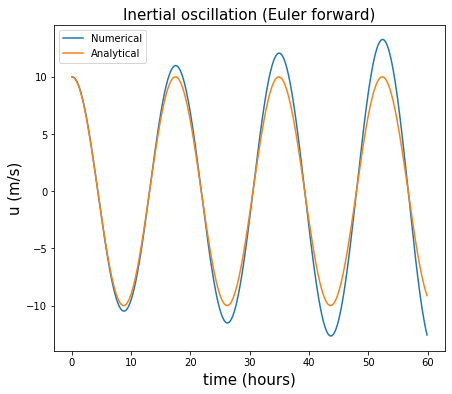

In [269]:
#Euler forward graph
plt.figure(figsize=(7,6))
plt.xlabel('time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Euler forward)',fontsize=15)
plt.plot(time/3600, u,label='Numerical')
plt.plot(time/3600, u_ana,label='Analytical')
plt.legend()
plt.show()

In [270]:
#Leapfrog timeloop

ulp = np.zeros((nt_len))
vlp = np.zeros((nt_len))
KE = np.zeros((nt_len-1))
#time loop

ulp[0]=10.0
for nt in range(0,nt_len-1):
    ulp[nt+1] = ulp[nt] + (fCor * (vlp[nt+1]+vlp[nt-1])/2 * dt)
    vlp[nt+1] = vlp[nt] - (fCor * ulp[nt] * dt)
    KE[nt] = .5*(vlp[nt]**2+ulp[nt]**2)


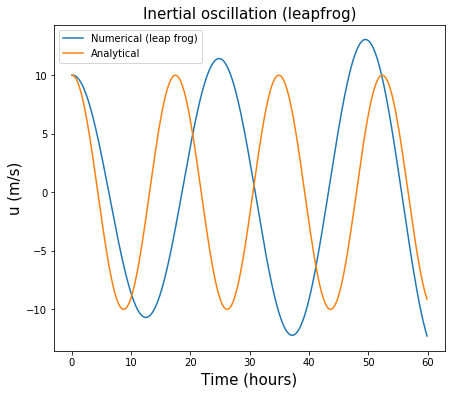

In [271]:
#Leapfrog graph
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (leapfrog)',fontsize=15)
plt.plot(time/3600, ulp,label='Numerical (leap frog)')
plt.plot(time/3600, u_ana,label='Analytical')
plt.legend()
plt.show()

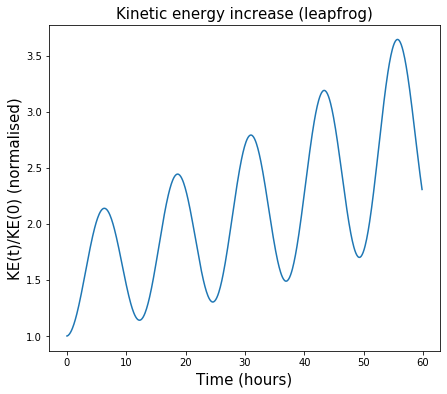

In [272]:
#Leapfrog energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy increase (leapfrog)',fontsize=15)
plt.plot(time[0:719]/3600,KE/50)
plt.ylabel('KE(t)/KE(0) (normalised)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()

In [291]:
#Euler backward time loop
uma = np.zeros((nt_len))
vma = np.zeros((nt_len))
KEma = np.zeros((nt_len-1))

uma[0]=10.0




for nt in range(1,nt_len-1):
    time[nt] = time[nt-1]+dt  
    uma[nt] = uma[nt-1] + (fCor * vma[nt-1] * dt)
    vma[nt] = vma[nt-1] - (fCor * uma[nt-1] * dt)
    u[nt] = uma[nt-1] + (fCor * vma[nt] * dt)
    v[nt] = vma[nt-1] - (fCor * uma[nt] * dt)
    KEma[nt] = .5*(vma[nt]**2+uma[nt]**2)    

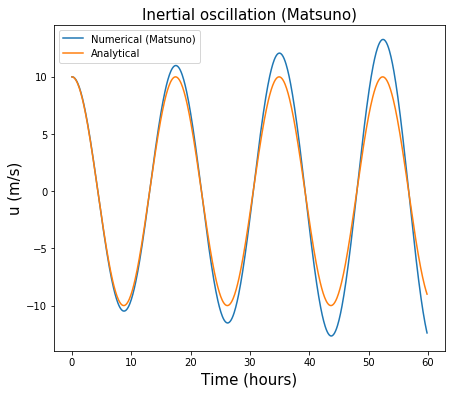

In [292]:
#Euler backward graph
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Matsuno)',fontsize=15)
plt.plot(time[0:719]/3600, uma[0:719],label='Numerical (Matsuno)')
plt.plot(time[0:719]/3600, u_ana[0:719],label='Analytical')
plt.legend()
plt.show()

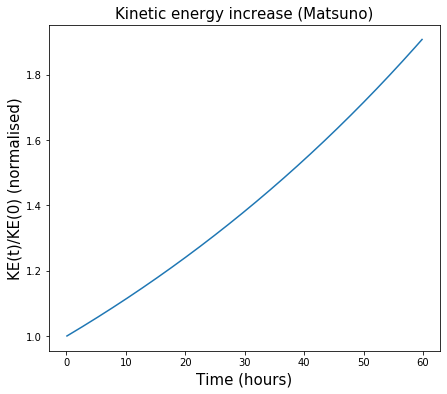

In [307]:
#Matsuno energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy increase (Matsuno)',fontsize=15)
plt.plot(time[1:719]/3600,KEma[1:719]/50)
plt.ylabel('KE(t)/KE(0) (normalised)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()

In [296]:
#Heun's backward time loop
uH = np.zeros((nt_len))
vH = np.zeros((nt_len))
KEH = np.zeros((nt_len-1))

uH[0]=10.0

for nt in range(1,nt_len-1):
    time[nt] = time[nt-1]+dt  
    uH[nt] = uH[nt-1] + (fCor * vH[nt-1] * dt)
    vH[nt] = vH[nt-1] - (fCor * uH[nt-1] * dt)
    uH[nt] = uH[nt-1] + (fCor * (vH[nt]+vH[nt-1]) * dt)/2
    vH[nt] = vH[nt-1] - (fCor * (uH[nt]+uH[nt-1]) * dt)/2
    KEH[nt] = .5*(vH[nt]**2+uH[nt]**2)    

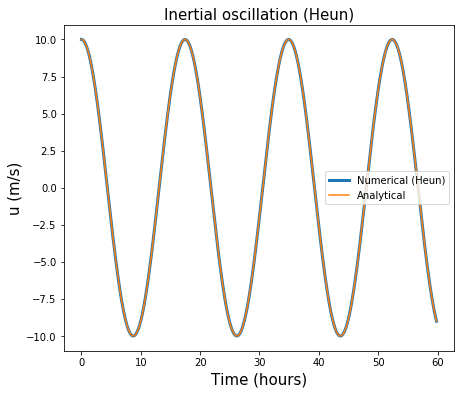

In [305]:
#Heun's graph
plt.figure(figsize=(7,6))
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('u (m/s)',fontsize=15)
plt.title('Inertial oscillation (Heun)',fontsize=15)
plt.plot(time[0:719]/3600, uH[0:719],label='Numerical (Heun)', linewidth=3)
plt.plot(time[0:719]/3600, u_ana[0:719],label='Analytical')
plt.legend()
plt.show()

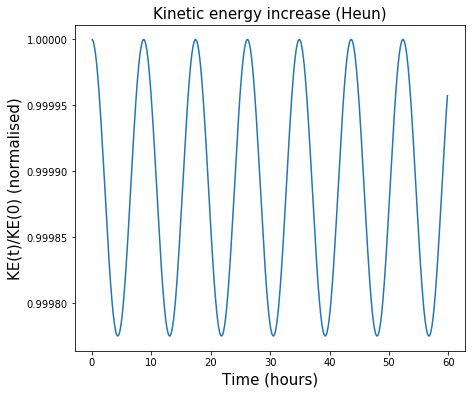

In [310]:
#Leapfrog energy graph

plt.figure(figsize=(7,6))
plt.title('Kinetic energy increase (Heun)',fontsize=15)
plt.plot(time[1:719]/3600,KEH[1:719]/50)
plt.ylabel('KE(t)/KE(0) (normalised)',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.show()